In [2]:
import pandas as pd

# Replace 'FDI_India.csv' with the correct filename if different
df = pd.read_csv('/content/FDI data.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())  # View the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None
                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  

In [3]:
print(df.columns)


Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')


In [9]:
# Melt the dataframe to long format
df_long = df.melt(id_vars='Sector', var_name='financial_year', value_name='amount_in_usd_million')

# Extract the year from 'financial_year'
df_long['financial_year'] = df_long['financial_year'].apply(lambda x: int(x.split('-')[0]))

# Verify changes
print(df_long.head())


                     Sector  financial_year  amount_in_usd_million
0  METALLURGICAL INDUSTRIES            2000                  22.69
1                    MINING            2000                   1.32
2                     POWER            2000                  89.42
3   NON-CONVENTIONAL ENERGY            2000                   0.00
4           COAL PRODUCTION            2000                   0.00


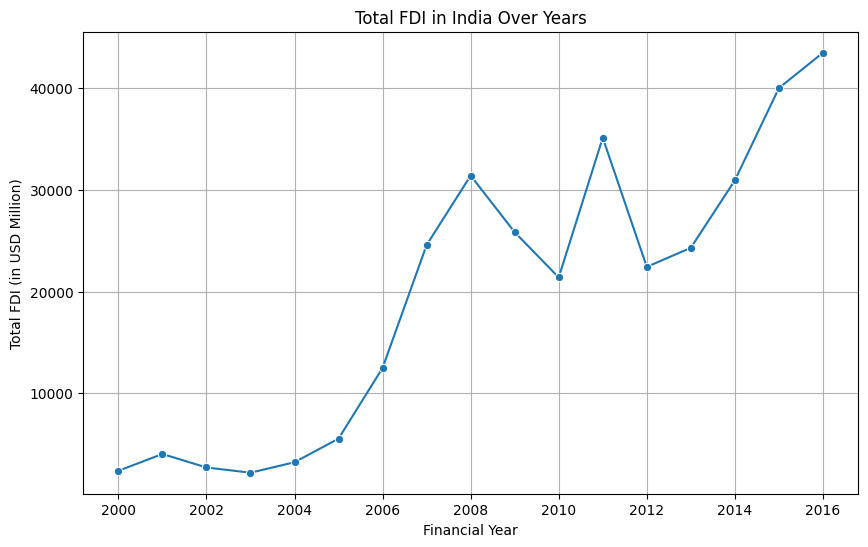

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total FDI per year
yearly_fdi = df_long.groupby('financial_year')['amount_in_usd_million'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='financial_year', y='amount_in_usd_million', data=yearly_fdi, marker='o')
plt.title('Total FDI in India Over Years')
plt.xlabel('Financial Year')
plt.ylabel('Total FDI (in USD Million)')
plt.grid(True)
plt.show()
plt.savefig('Total_FDI_per_year.png')

<ipython-input-14-90583855e8f2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sector', x='amount_in_usd_million', data=sector_fdi, palette='viridis')


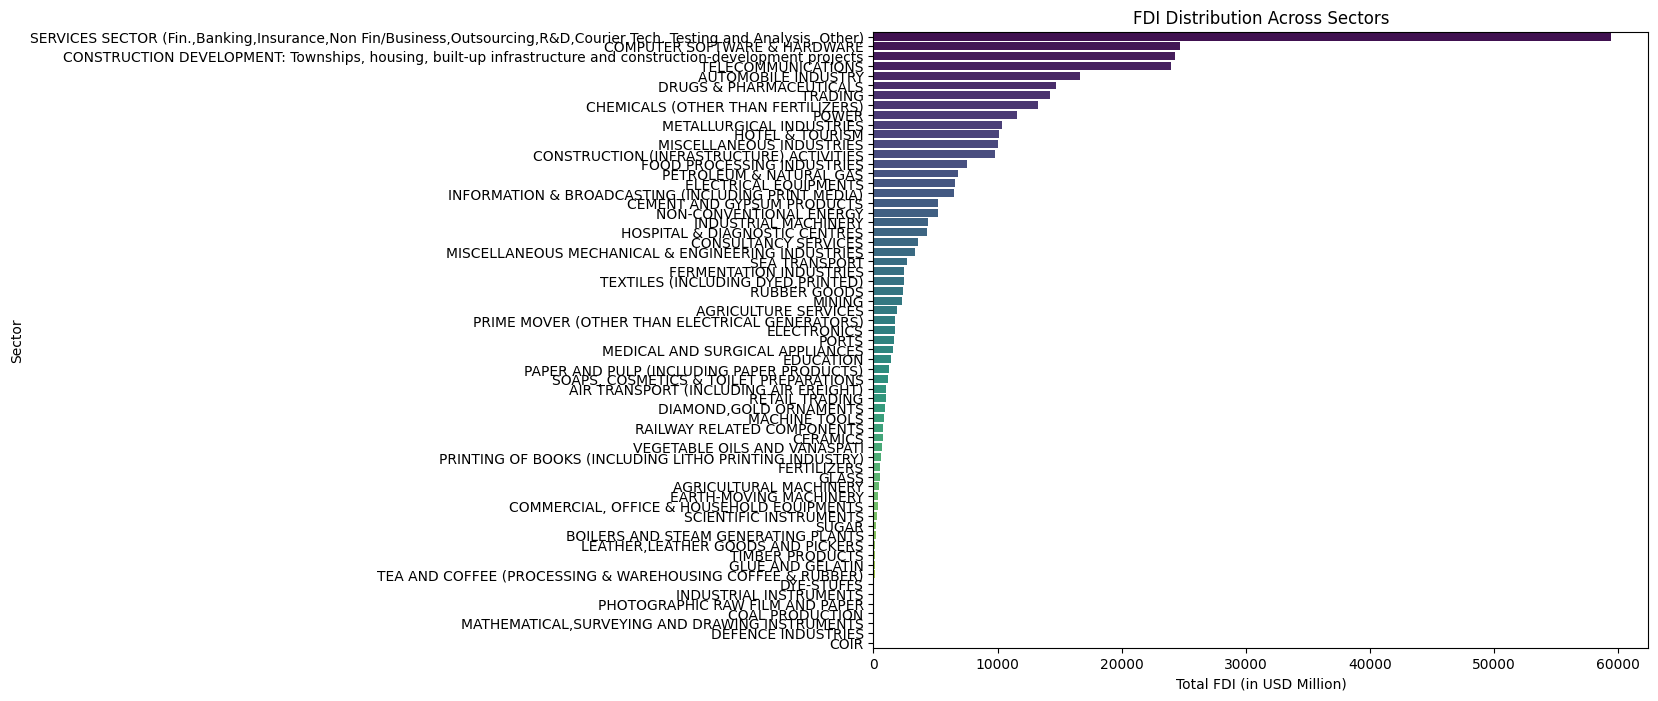

In [14]:
# Calculate total FDI for each sector over all years
sector_fdi = df_long.groupby('Sector')['amount_in_usd_million'].sum().reset_index()
sector_fdi = sector_fdi.sort_values(by='amount_in_usd_million', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y='Sector', x='amount_in_usd_million', data=sector_fdi, palette='viridis')
plt.title('FDI Distribution Across Sectors')
plt.xlabel('Total FDI (in USD Million)')
plt.ylabel('Sector')
plt.show()


In [15]:
top_20_sectors = sector_fdi.sort_values(by='amount_in_usd_million', ascending=False).head(20)

<ipython-input-17-fc1499eef327>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='sector', x='amount_in_usd_million', data=top_20_year_fdi, palette='viridis')


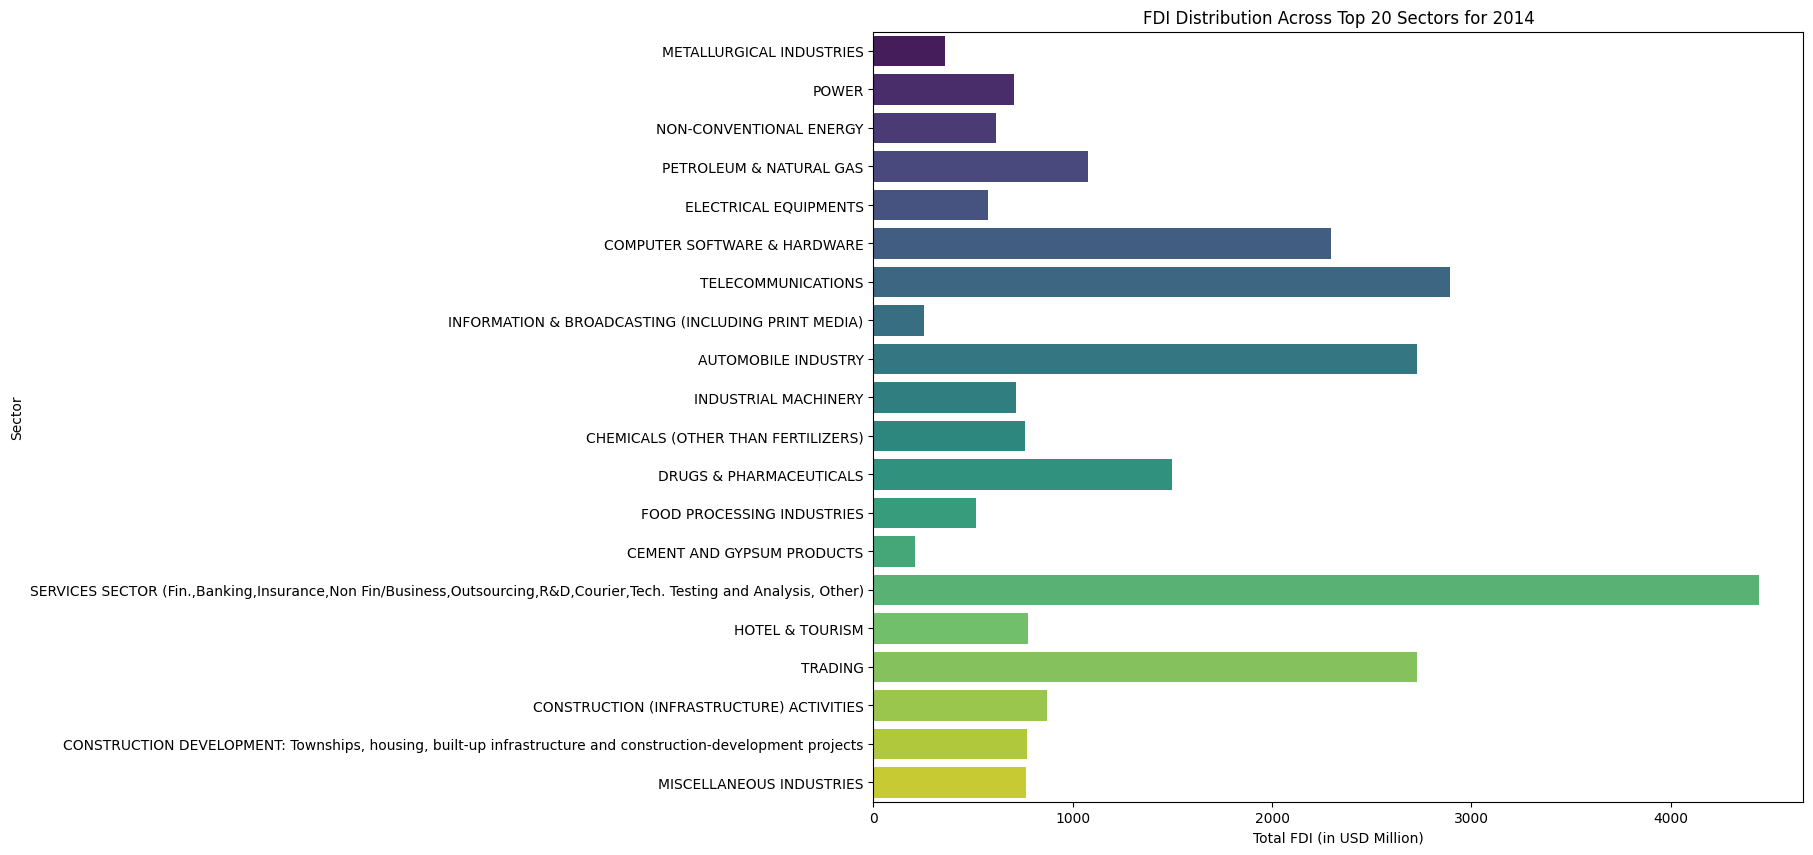

In [ ]:
# Filter the top 20 sectors for a specific year
year = 2014  # Change this to the year you want to analyze
top_20_year_fdi = df_long[(df_long['financial_year'] == year) & (df_long['sector'].isin(top_20_sectors['sector']))]

# Plot FDI distribution across top 20 sectors for the selected year
plt.figure(figsize=(12, 10))
sns.barplot(y='sector', x='amount_in_usd_million', data=top_20_year_fdi, palette='viridis')
plt.title(f'FDI Distribution Across Top 20 Sectors for {year}')
plt.xlabel('Total FDI (in USD Million)')
plt.ylabel('Sector')
plt.show()


<ipython-input-12-a0946815bae4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='sector', x='amount_in_usd_million', data=top_20_sectors, palette='viridis')


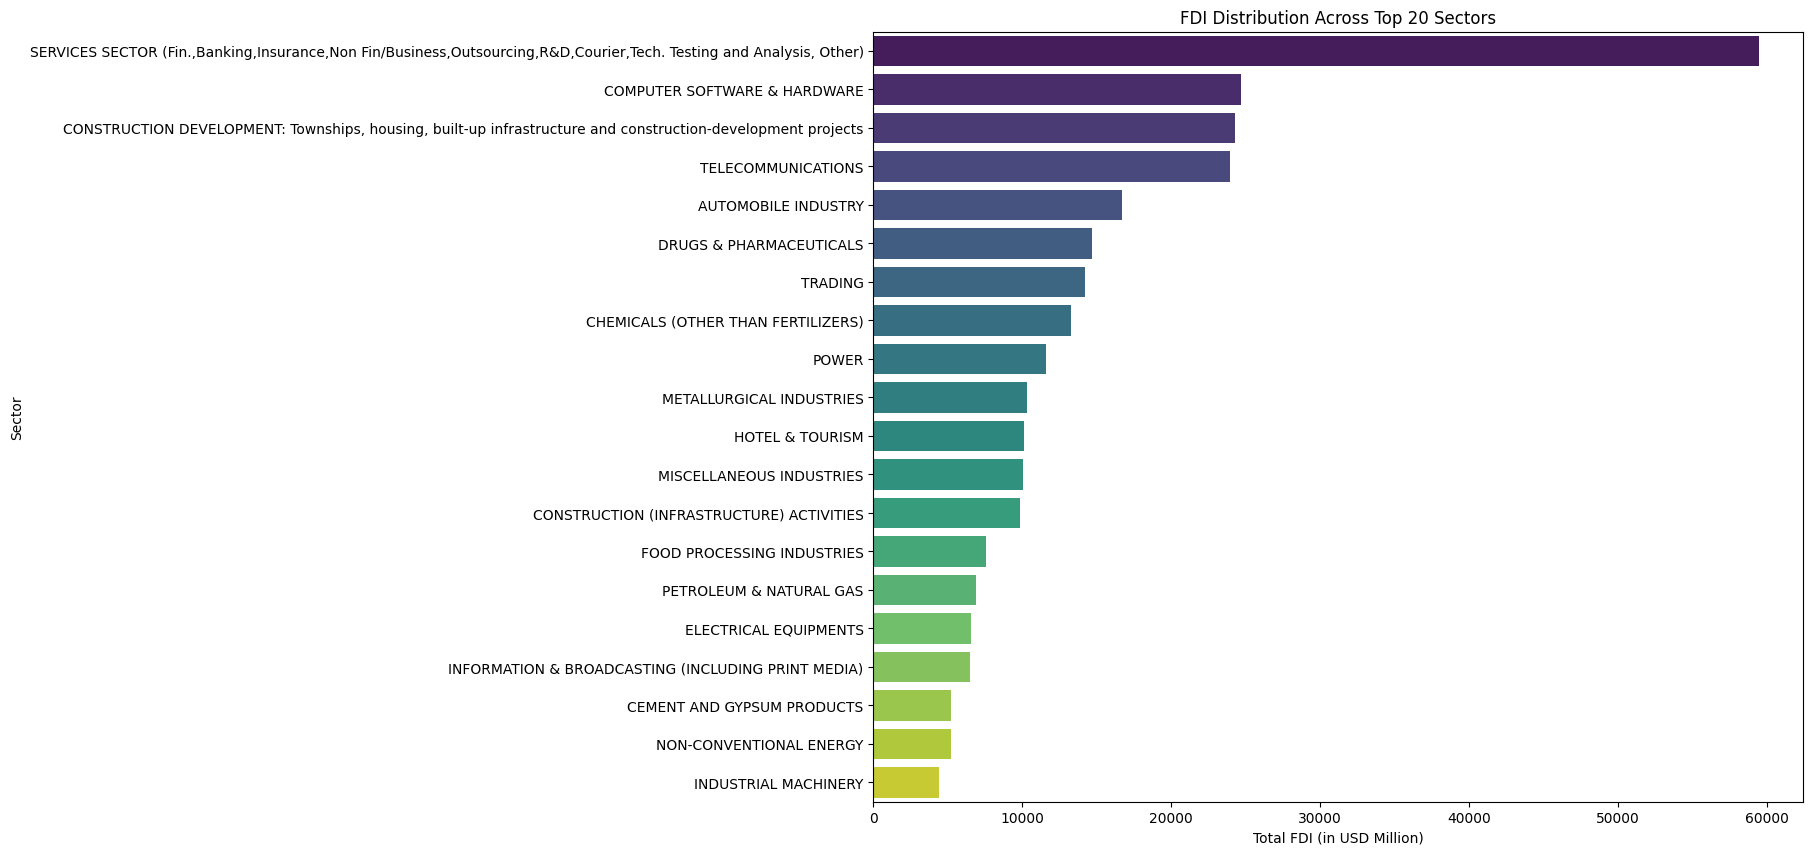

In [ ]:
# Save the plot as an image file (e.g., PNG)
plt.figure(figsize=(12, 10))
sns.barplot(y='sector', x='amount_in_usd_million', data=top_20_sectors, palette='viridis')
plt.title('FDI Distribution Across Top 20 Sectors')
plt.xlabel('Total FDI (in USD Million)')
plt.ylabel('Sector')
plt.savefig('top_20_sectors_fdi.png')


<ipython-input-20-2740652d51fa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sector', x='growth_percentage', data=top_10_growth_sectors, palette='viridis')


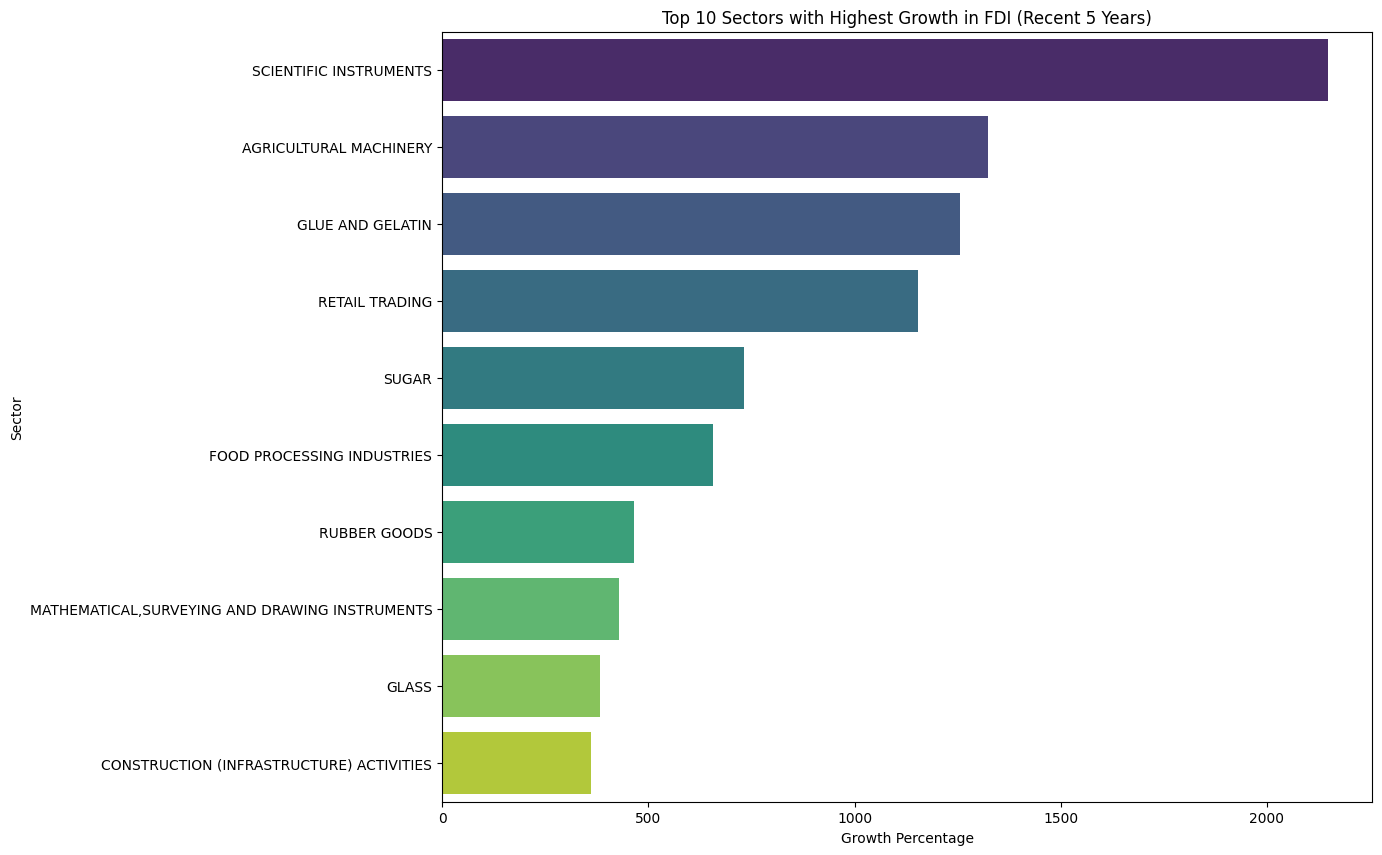

<Figure size 640x480 with 0 Axes>

In [20]:
# Define the columns for the recent 5 years and the previous 5 years
recent_years = ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
previous_years = ['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']

# Calculate total FDI for each sector for the recent 5 years
df['recent_five_years'] = df[recent_years].sum(axis=1)

# Calculate total FDI for each sector for the previous 5 years (or a similar earlier period)
df['previous_five_years'] = df[previous_years].sum(axis=1)

# Calculate the growth percentage for each sector
df['growth_percentage'] = ((df['recent_five_years'] - df['previous_five_years']) / df['previous_five_years']) * 100

# Filter the top 10 sectors based on the highest growth percentage
top_10_growth_sectors = df.sort_values(by='growth_percentage', ascending=False).head(10)

# Visualize the growth of the top 10 sectors
plt.figure(figsize=(12, 10))
sns.barplot(y='Sector', x='growth_percentage', data=top_10_growth_sectors, palette='viridis')
plt.title('Top 10 Sectors with Highest Growth in FDI (Recent 5 Years)')
plt.xlabel('Growth Percentage')
plt.ylabel('Sector')
plt.show()
plt.savefig('top_10_growth_sectors_fdi.png')